## PandasAI

Exploring if PandasAI can help with exploratory data anylysis.

PandasAI requires OpenAI API key to works, and you can generate a new API from this link below.

`https://platform.openai.com/api-keys`

## Setup

Import essential libraries for dotenv setup.

So we can git ignore the .env file and it will not be commited to GitHub.

In [8]:
import os
from dotenv import load_dotenv

load_dotenv()
openai_api_token = os.getenv('openai_api_token') # retrieve openai_api_token from .env file

Import PandasAI libraries and assign OpenAI API key.

In [9]:
from pandasai.llm import OpenAI
from pandasai import SmartDataframe
from pandasai import SmartDatalake

# replace your openai api token here if not using .env file and comment the .env part above
llm = OpenAI(api_token=openai_api_token)

Import Pandas library and setup the dataframe

In [10]:
import pandas as pd

raw_match_data_csv = pd.read_csv('datasets/2024_LoL_esports_match_data_from_OraclesElixir_gamedata.csv', sep=',')
raw_match_data = pd.DataFrame(raw_match_data_csv)

raw_champion_data_csv = pd.read_csv('datasets/LoL-Champions.csv', sep=',')
raw_champion_data = pd.DataFrame(raw_champion_data_csv)

## SmartDataframe

Need to use SmartDataframe for PandasAI.

In [11]:
sdf = SmartDataframe(raw_match_data, config = {'llm': llm})

response1 = sdf.chat("""Can you clean the dataset as I only need the champions data and match result. The champions columns are in this formet t1p1_champion.""")
print(response1)
print(sdf.last_code_generated) # print the code used by pandasai

/var/folders/5s/wdvjkd_x25q036g2mmsyj8h00000gn/T/ipykernel_40247/1545336201.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  response1 = sdf.chat("""Can you clean the dataset as I only need the champions data and match result. The champions columns are in this formet t1p1_champion.""")
/var/folders/5s/wdvjkd_x25q036g2mmsyj8h00000gn/T/ipykernel_40247/1545336201.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  response1 = sdf.chat("""Can you clean the dataset as I only need the champions data and match result. The champions 

                  gameid  t1_result  t2_result  t1_damagetochampions  \
0     10660-10660_game_3          1          0                 60633   
1        LOLTMNT05_13659          1          0                 42914   
2        LOLTMNT04_24264          1          0                 73210   
3        LOLTMNT01_52094          1          0                 74204   
4        LOLTMNT02_29074          1          0                 62549   
...                  ...        ...        ...                   ...   
1018     LOLTMNT05_13780          0          1                151629   
1019  10698-10698_game_1          0          1                121938   
1020     LOLTMNT02_33054          0          1                150724   
1021  10752-10752_game_1          0          1                148139   
1022     LOLTMNT02_23326          1          0                165579   

      t2_damagetochampions t1p1_champion  t1p1_damagetochampions  \
0                    34620           Jax                   10749   

Another example using SmartDataframe.

In [18]:
response2 = sdf.chat("""What are some interesting questions I can use for EDA from this dataset?""")
print(response2)

Some interesting questions for EDA could be:
1. Which champion has the highest win rate?
2. Is there a correlation between specific champions picked and match outcomes?
3. How does the distribution of champions vary across different leagues or years?
4. Are there any trends in champion picks over time?
5. Can we predict match results based on champion selections?


Another example using SmartDataframe.

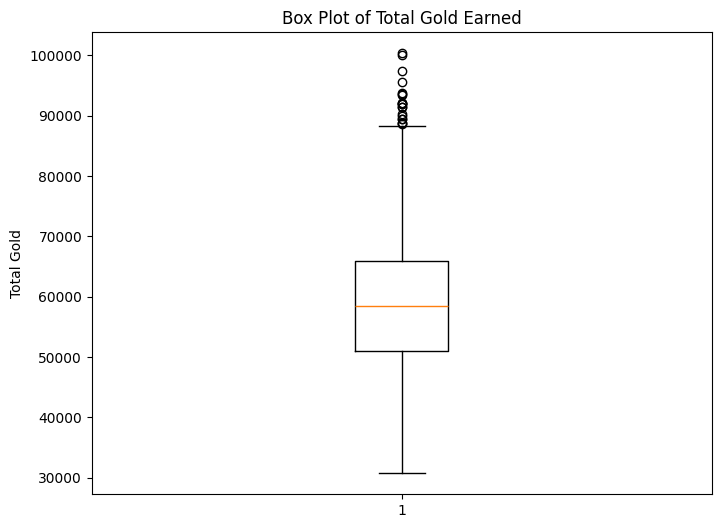

Unfortunately, I was not able to answer your question, because of the following error:

[Errno 2] No such file or directory: '/Users/julian/Downloads/ntu/dsai/Mini-Project-Group-R.B.E/exports/charts/temp_chart.png'



Traceback (most recent call last):
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/julian/Downl

In [20]:
response3 = sdf.chat("""Can you create a box plot to show the total gold earned?""")
print(response3)

## SmartDatalake

Need to use SmartDatalake instead of SmartDataframe for multiple dataframes.

In [23]:
lake = SmartDatalake([raw_match_data, raw_champion_data], config={'llm': llm})

response4 = lake.chat("""Can you clean both datasets as I only need the champions data, champions class and match result. The champions columns are in this formet t1p1_champion.""")
print(response4)

/var/folders/5s/wdvjkd_x25q036g2mmsyj8h00000gn/T/ipykernel_40247/2973472612.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  response4 = lake.chat("""Can you clean both datasets as I only need the champions data, champions class and match result. The champions columns are in this formet t1p1_champion.""")
/var/folders/5s/wdvjkd_x25q036g2mmsyj8h00000gn/T/ipykernel_40247/2973472612.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  response4 = lake.chat("""Can you clean both datasets as I only need the champions data, champion

Unfortunately, I was not able to answer your question, because of the following error:

"None of [Index(['t1_result'], dtype='object')] are in the [columns]"



Traceback (most recent call last):
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/Users/julian/Downloads/ntu/virtualenv/lib/python3.12/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code

## What We Learn

Although PandasAI works, however, it is not useful to use in EDA as the responses are not accurate. Sometimest it may not work as shown above (although the SmartDatalake works a few times when tried previously), and the responses also varies every rerun.